In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\PRAVEEN\Downloads\brain_tumor_dataset.csv") 

data = data.drop(columns=['Patient_ID'])

from sklearn.model_selection import train_test_split

X = data.drop(columns=['Stage'])  
y = data['Stage']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16000, 17) (4000, 17) (16000,) (4000,)


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

In [5]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(16000, 17) (4000, 17)


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Resampled class distribution:")
print(y_train_resampled.value_counts())

Resampled class distribution:
Stage
II     4074
I      4074
III    4074
IV     4074
Name: count, dtype: int64


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           I       0.26      0.25      0.26       997
          II       0.24      0.27      0.25      1019
         III       0.22      0.22      0.22       991
          IV       0.26      0.24      0.25       993

    accuracy                           0.25      4000
   macro avg       0.25      0.25      0.25      4000
weighted avg       0.25      0.25      0.25      4000

Confusion Matrix:
 [[252 271 253 221]
 [259 273 249 238]
 [244 303 214 230]
 [213 289 248 243]]


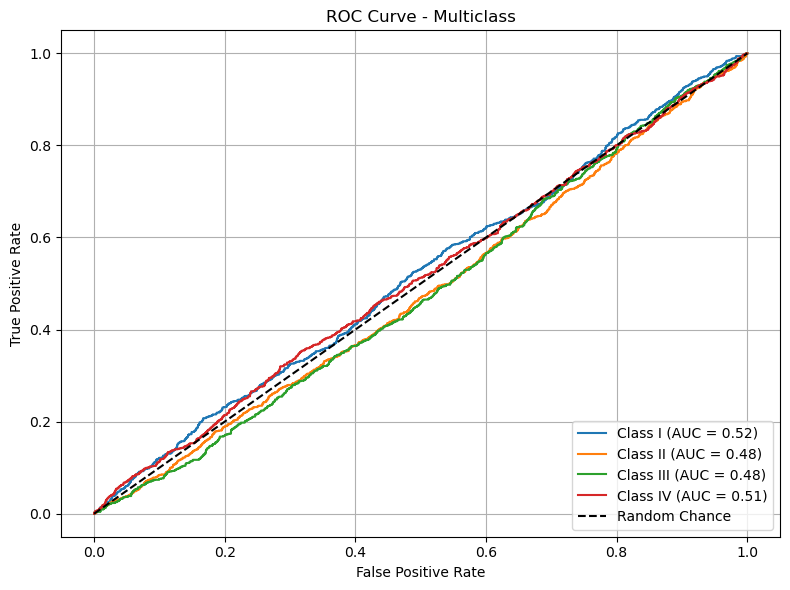

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)

fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(model.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == model.classes_[i], y_prob[:, i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

ImportError: cannot import name 'ConfusionMatrixDispla' from 'sklearn.metrics' (C:\Users\PRAVEEN\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)